In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# This notebook should be run under "scripts/"

import sys
import os

PATH = os.getcwd()
for _ in range(2):
    PATH = os.path.dirname(PATH)

if PATH not in sys.path:
    sys.path.append(PATH)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


from BusinessAnalyticsProject.dataset.feature_engineering import train_test_split
from BusinessAnalyticsProject.models.model_selection import (
    create_pipeline,
    hyperparam_tuning,
    metrics,
    benchmark
)
from BusinessAnalyticsProject.configs.RF import CONFIG as RF_CONFIG
from BusinessAnalyticsProject.models.model_interpretation import (
    create_benchmark_plot,
    create_feature_importance_plot
)

In [4]:
sns.set_theme()

## Read in Features

In [5]:
all_train_df = pd.read_csv("../data/processed/all_train.csv", index_col=[0], parse_dates=["Date"])
all_test_df = pd.read_csv("../data/processed/all_test.csv", index_col=[0], parse_dates=["Date"])

X_train, y_train, weights_train, X_test, y_test, weights_test = train_test_split(all_train_df)
X_train.shape, y_train.shape, weights_train.shape, X_test.shape, y_test.shape, weights_test.shape

((294132, 15), (294132,), (294132,), (127438, 15), (127438,), (127438,))

## Benchmark: WLS

In [6]:
pipeline_data = create_pipeline(
    None,
    None,
    if_to_one_hot=True
)
pipeline_data

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('one_hot', OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000021A630F0160>),
                                ('continuous',
                                 Pipeline(steps=[('dummy',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function identity at 0x0000021A242A0B80>))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000021A630F0100>)])

In [7]:
results, metrics_val = benchmark(
    pipeline_data,
    X_train, y_train, weights_train,
    X_test, y_test, weights_test
)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.545
Model:                            WLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     3589.
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:20:35   Log-Likelihood:            -3.4164e+06
No. Observations:              294132   AIC:                         6.833e+06
Df Residuals:                  294033   BIC:                         6.834e+06
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        5281.7801    303.020     17.430      0.000    4687.870    5875.690
categorical__Dept_1          6266.5554    309.478     20.249      0.000    5659.986    6873.124
categorical__Dept_2          2.876e+04    309.478     92.923      0.000    2.82e+04    2.94e+04
categorical__Dept_3         -2023.4736    309.478     -6.538      0.000   -2630.043   -1416.905
categorical__Dept_4          1.292e+04    309.478     41.752      0.000    1.23e+04    1.35e+04
categorical__Dept_5          1.794e+04    311.668     57.562      0.000    1.73e+04    1.86e+04
categorical__Dept_6         -6329.6890    316.459    -20.002      0.000   -6949.940   -5709.438
categorical__Dept_7          1.768e+04    309.478     57.115      0.000    1.71e+04    1.83e+04
categorical__Dept_8          1.613e+04    309.478     52.109      0.000    1.55e+04    1.67e+04
categorical__Dept_9          5615.0217    312.170     17.987      0.000    5003.178    6226.866
categorical__Dept_10         4798.9369    309.478     15.507      0.000    4192.368    5405.506
categorical__Dept_11          989.2073    309.487      3.196      0.001     382.622    1595.793
categorical__Dept_12        -9660.5977    310.108    -31.152      0.000   -1.03e+04   -9052.795
categorical__Dept_13         1.664e+04    309.478     53.763      0.000     1.6e+04    1.72e+04
categorical__Dept_14         5791.0070    309.478     18.712      0.000    5184.438    6397.576
categorical__Dept_16        -4723.8051    309.478    -15.264      0.000   -5330.374   -4117.236
categorical__Dept_17        -2084.6492    309.495     -6.736      0.000   -2691.251   -1478.048
categorical__Dept_18        -1248.0820    321.114     -3.887      0.000   -1877.457    -618.707
categorical__Dept_19        -1.425e+04    366.219    -38.917      0.000    -1.5e+04   -1.35e+04
categorical__Dept_20        -8502.8768    319.726    -26.594      0.000   -9129.530   -7876.223
categorical__Dept_21        -8134.7607    309.478    -26.285      0.000   -8741.330   -7528.192
categorical__Dept_22        -2135.9925    327.908     -6.514      0.000   -2778.682   -1493.303
categorical__Dept_23         1.039e+04    324.661     32.003      0.000    9753.685     1.1e+04
categorical__Dept_24        -8345.9391    330.734    -25.235      0.000   -8994.169   -7697.710
categorical__Dept_25        -4446.5103    310.579    -14.317      0.000   -5055.236   -3837.785
categorical__Dept_26        -6330.0423    322.943    -19.601      0.000   -6963.002   -5697.083
categorical__Dept_27        -1.336e+04    328.017    -40.737      0.000    -1.4e+04   -1.27e+04
categorical__Dept_28        -1.323e+04    314.917    -42.022      0.000   -1.39e+04   -1.26e+04
categorical__Dept_29        -9412.4149    332.741    -28.288      0.000   -1.01e+04   -8760.252
categorical

In [8]:
metrics_val

{'r2_score': 0.5584703470516706,
 'rmse': 14698.534011053565,
 'rwmse': 5738919.085240822}

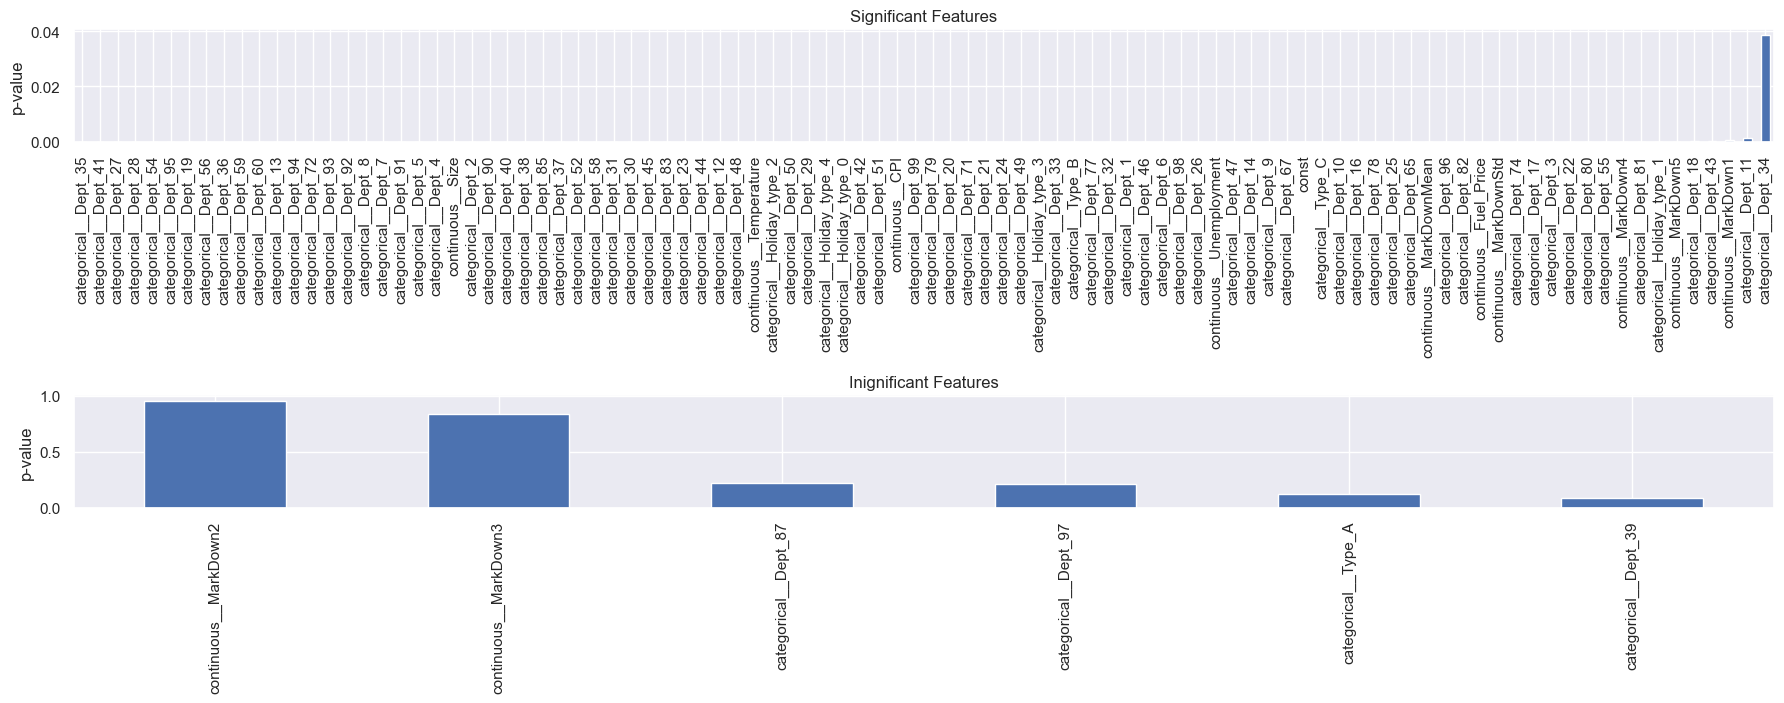

In [9]:
fig, axes = create_benchmark_plot(results)

## Hyperparamter Tuning for ML Models

1. Register a new model by creating a configuration file under ```configs/```. For example, ```RegressionForestRegressor``` is registered by creating ```configs/RF.py```
    1. You need to create ```CONFIG``` dict with the same keys
    1. Then fill in the model class, default parameters and parameter search space
    1. Import the ```CONFIG``` dict by ```from BusinessAnalyticsProject.configs.RF import CONFIG as RF_CONFIG```

1. Create a pipeline using ```create_pipeline(.)```. You can specify whether to 
    - use winsorization (cutting extreme quantiles like < 2% and > 98%), 
    - use data normalization (StandardScalar()) and/or 
    - do one-hot encoding for categorical columns.
1. Run hyperparameter tuning using ```hyperparam_tuning(.)```
    1. You need to specify a ```save_dir``` directory. The refitted best model, all metrics ($R^2$, RMSE and WRMSE(Weighted RMSE)) and cross-validation results are saved in the ```save_dir```.

In [10]:
# Step 1
RF_CONFIG  ## Load your model configuaration dict

{'model_cls': sklearn.ensemble._forest.RandomForestRegressor,
 'params': {'n_estimators': 100, 'max_depth': 5, 'verbose': 1, 'n_jobs': 5},
 'param_space': {'n_estimators': [2, 5, 10, 50, 75],
  'max_depth': [None, 3, 5, 7],
  'min_samples_split': [2, 5, 10, 20],
  'min_samples_leaf': [1, 2, 5, 10, 20],
  'max_features': [None, 'sqrt', 'log2', 1.0]}}

In [11]:
# Step 2
pipeline = create_pipeline(
    RF_CONFIG["model_cls"],
    RF_CONFIG["params"],
    if_winsorization=False,
    if_data_normalization=False,
    if_to_one_hot=True
)
pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AD1ED5CE20>),
                                                 ('continuous',
                                                  Pipeline(steps=[('dummy',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function identity at 0x000001AD7FDFD040>))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AD1ED5CB20>)])),
                ('model',
                 RandomForestRegressor(max_depth=5, n_jobs=5, verbose=1))])

In [12]:
# Step 3
opt, metrics_val = hyperparam_tuning(
    pipeline,
    RF_CONFIG["param_space"],
    X_train,
    y_train,
    weights_train,
    X_test,
    y_test,
    weights_test,
    save_dir="../outputs/models/RF/"  ## Change to your save_dir
)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  2.6min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  4.9min finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:    0.3s finished


In [14]:
metrics_val

{'r2_score': 0.9072690756499566,
 'rmse': 6736.0666885164555,
 'rwmse': 2659504.809981215}

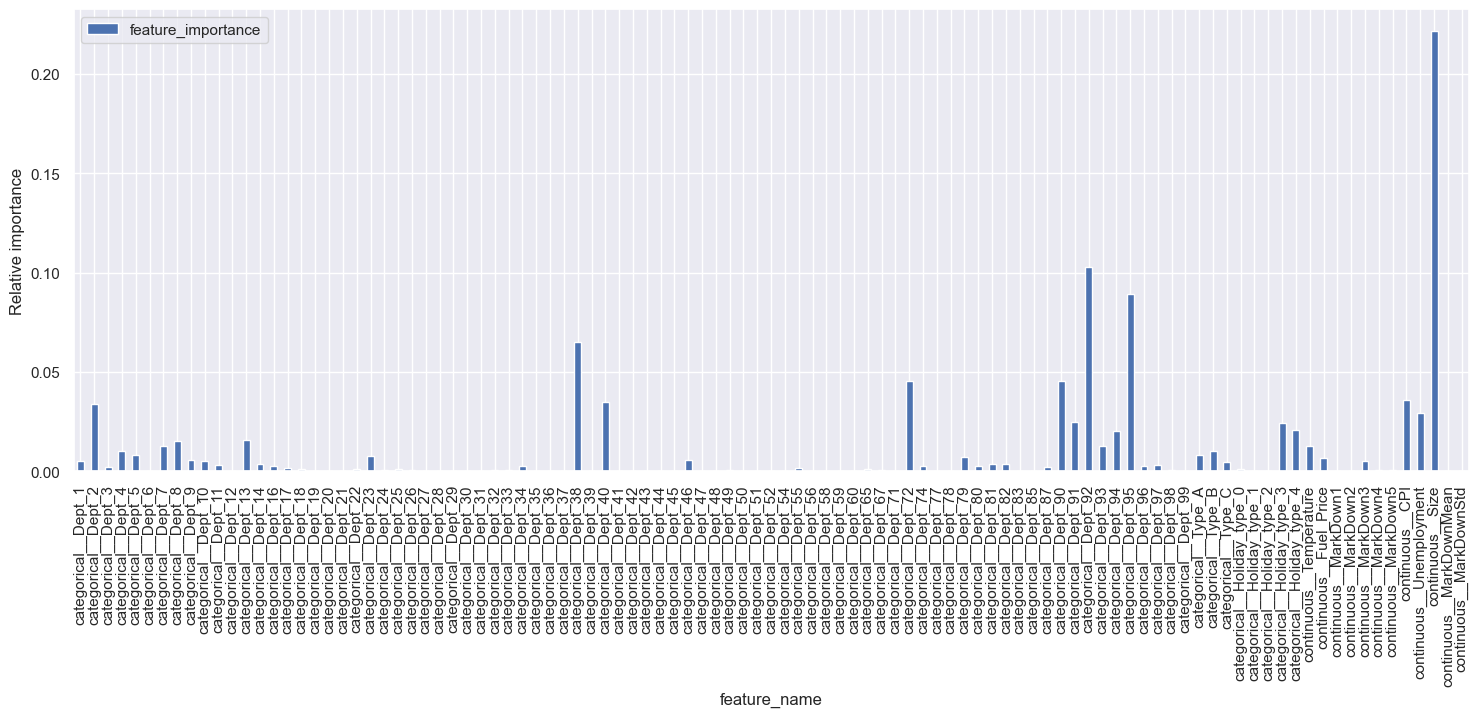

In [17]:
fig, axes = create_feature_importance_plot(opt.best_estimator_)